## Case Study : Confidence Interval and Central Limit Theorem

<b>Problem Statement:<b>

Problem Statement: Determine spending habit difference between male and female customers on Black Friday

# Import the necessary packages

In [546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.patches import Polygon

In [547]:
sns.set_style('darkgrid')

# Read dataset into pandas dataframe
1. Check for shape of dataFrame
2. Check for unique values of categorical variables
3. Check for null values 
4. Check for .info()
5. Check for .describe()
6. Check for duplicate rows

In [548]:
a_df = pd.read_csv('train.csv')

In [549]:
a_df.shape

(550068, 10)

In [550]:
a_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [551]:
a_df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [552]:
sorted(a_df['Gender'].unique())

['F', 'M']

In [553]:
sorted(a_df['Age'].unique())

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [554]:
sorted(a_df['Occupation'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [555]:
sorted(a_df['City_Category'].unique())

['A', 'B', 'C']

In [556]:
sorted(a_df['Stay_In_Current_City_Years'].unique())

['0', '1', '2', '3', '4+']

In [557]:
sorted(a_df['Marital_Status'].unique())

[0, 1]

In [558]:
sorted(a_df['Product_Category'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [559]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [560]:
a_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# There is isn't shown a significane difference in mean and median of purchase amount
1. Outliers won't be that much of a trouble as mean and median don't show very large difference

In [561]:
a_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [562]:
a_df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [563]:
a_df.duplicated().sum()

0

# Draw box plot to check median, quantiles and outliers for Black Friday sales
1. Both male and female shows outliers on upper bound
2. Male and Female customers have almost same median purchase amount

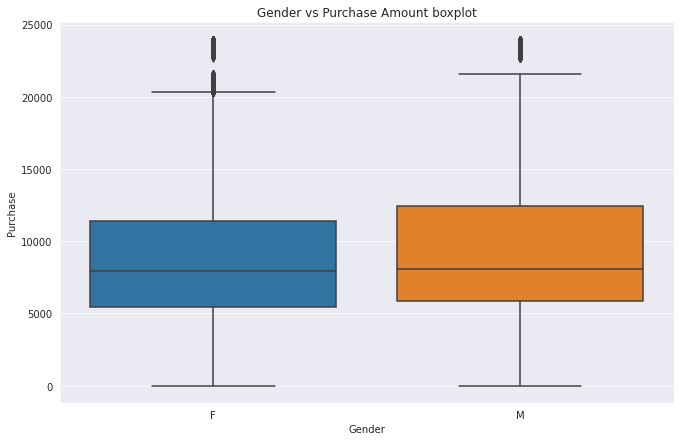

In [564]:
plt.rcParams['figure.figsize'] = (11, 7)
sns.boxplot(data=a_df,y='Purchase',x='Gender')
plt.title('Gender vs Purchase Amount boxplot')
plt.show()

# Draw box plot to check median, quantiles and outliers for Black Friday sales
1. All age group customers show outliers on upper bound
2. All age group customers have almost same median purchase amount

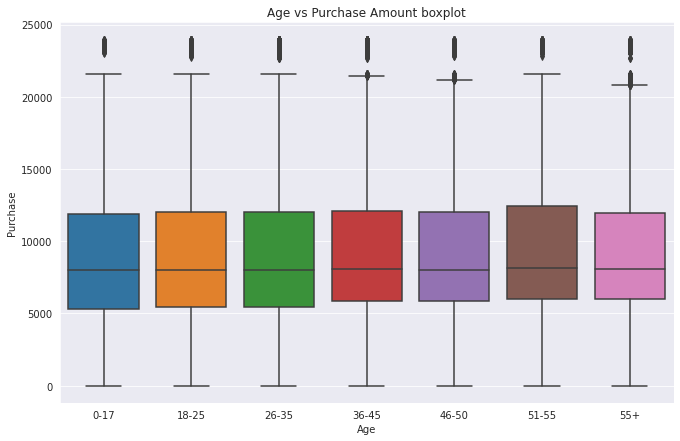

In [565]:
sort_index = a_df['Age'].sort_values().index
sort_df = a_df.loc[sort_index]
plt.rcParams['figure.figsize'] = (11,7)
sns.boxplot(data=sort_df,y='Purchase',x='Age')
plt.title('Age vs Purchase Amount boxplot')
plt.show()

# Draw box plot to check median, quantiles and outliers for Black Friday sales
1. Both single and married customers show outliers on upper bound
2. Single and married customers have almost same median purchase amount

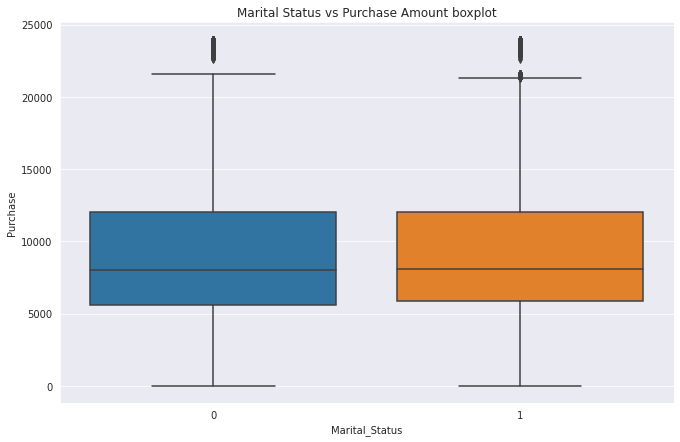

In [566]:
plt.rcParams['figure.figsize'] = (11,7)
sns.boxplot(data=a_df,y='Purchase',x='Marital_Status')
plt.title('Marital Status vs Purchase Amount boxplot')
plt.show()

# Isolate data for different types of customers making purchase on Black Friday
1. Extract data for below customers - Male, Female, Single, Married, Age Groups

In [567]:
a_df_male = a_df.loc[a_df['Gender']=='M']
a_df_female = a_df.loc[a_df['Gender']=='F']
a_df_single = a_df.loc[a_df['Marital_Status'] == 0]
a_df_married = a_df.loc[a_df['Marital_Status'] == 1]
a_df_A00_A17 = a_df.loc[a_df['Age'] == '0-17']
a_df_A18_A25 = a_df.loc[a_df['Age'] == '18-25']
a_df_A26_A35 = a_df.loc[a_df['Age'] == '26-35']
a_df_A36_A45 = a_df.loc[a_df['Age'] == '36-45']
a_df_A46_A50 = a_df.loc[a_df['Age'] == '46-50']
a_df_A51_A55 = a_df.loc[a_df['Age'] == '51-55']
a_df_A55_AXX = a_df.loc[a_df['Age'] == '55+']

print(a_df_male.shape)
print(a_df_female.shape)
print(a_df_single.shape)
print(a_df_married.shape)
print(a_df_A00_A17.shape)
print(a_df_A18_A25.shape)
print(a_df_A26_A35.shape)
print(a_df_A36_A45.shape)
print(a_df_A46_A50.shape)
print(a_df_A51_A55.shape)
print(a_df_A55_AXX.shape)

(414259, 10)
(135809, 10)
(324731, 10)
(225337, 10)
(15102, 10)
(99660, 10)
(219587, 10)
(110013, 10)
(45701, 10)
(38501, 10)
(21504, 10)


# Define function to find outliers for given attribute

In [568]:
def detectOutliers(df, attribute):
    Q1 = np.percentile(df[attribute], 25)
    Q3 = np.percentile(df[attribute], 75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = df.loc[(df[attribute] < LB) | (df[attribute] > UB)]
    
    print('Q1 : {}'.format(Q1))
    print('Q3 : {}'.format(Q3))
    print('IQR : {}'.format(IQR))
    print('LB : {}'.format(LB))
    print('UB : {}'.format(UB))
    print('Number of outliers : {}'.format(outliers.shape[0]))

# Detect outliers for male customers
1. Number of outliers are printed in the output

In [569]:
detectOutliers(a_df_male, 'Purchase')

Q1 : 5863.0
Q3 : 12454.0
IQR : 6591.0
LB : -4023.5
UB : 22340.5
Number of outliers : 1812


# Detect outliers for female customers
1. Number of outliers are printed in the output

In [570]:
detectOutliers(a_df_female, 'Purchase')

Q1 : 5433.0
Q3 : 11400.0
IQR : 5967.0
LB : -3517.5
UB : 20350.5
Number of outliers : 2065


# Detect outliers for single customers
1. Number of outliers are printed in the output

In [571]:
detectOutliers(a_df_single, 'Purchase')

Q1 : 5605.0
Q3 : 12061.0
IQR : 6456.0
LB : -4079.0
UB : 21745.0
Number of outliers : 1303


# Detect outliers for married customers
1. Number of outliers are printed in the output

In [572]:
detectOutliers(a_df_married, 'Purchase')

Q1 : 5843.0
Q3 : 12042.0
IQR : 6199.0
LB : -3455.5
UB : 21340.5
Number of outliers : 1233


# Central Limit Theorem
1. Define function to plot sampling distribution of sample means for purchase amount of customers on Black Friday
2. SDSM - Sampling Distribution of Sample Means

In [573]:
#SDSM - Sampling Distribution of Sample Means
def SDSM(df):
    plt.rcParams['figure.figsize'] = (13,7)
    sample_sizes = np.arange(30,500)
    sample_means = np.zeros(len(sample_sizes))
    for i in range(len(sample_sizes)):
        df_sample = df.sample(n=sample_sizes[i])
        sample_means[i] = np.mean(df_sample['Purchase'])
    plt.plot(sample_sizes, sample_means,'s-')
    plt.plot(sample_sizes[[0,-1]],[np.mean(df['Purchase']),np.mean(df['Purchase'])],'r',linewidth=3)
    plt.title('Sampling Distribution of Sample Means\n\u03bc={}'.format(np.mean(df['Purchase']).round(2)))
    plt.xlabel('Sample Size')
    plt.ylabel('Mean Value')
    plt.legend(('Sample Mean','Population Mean'))
    plt.show()
    
    sns.histplot(sample_means,kde=True)
    plt.xlabel('Feature Magnitude: Purchase amount')
    plt.show()

# Plotting sampling distribution of sample means for purchase amount for all customers. The distribution proves central limit theorem
1. Sample sizes used are 30,31,32,......,497,498,499
2. The distribution of sample means is Gaussian as shown in the below plots
3. The average purchase amount for overall customers is 9263.97

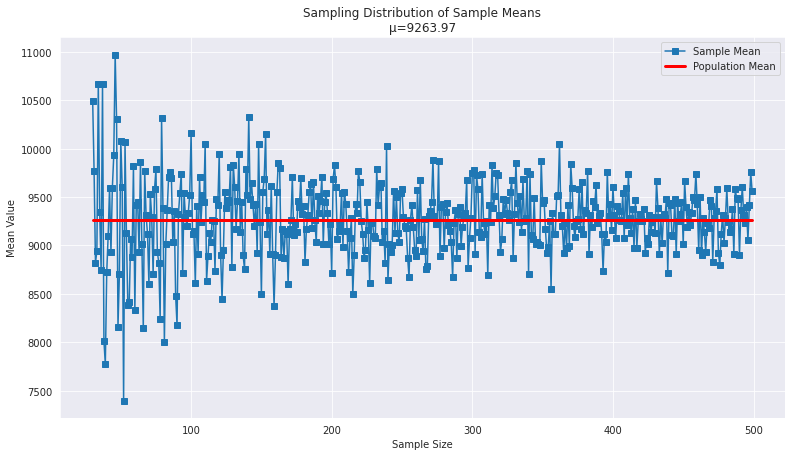

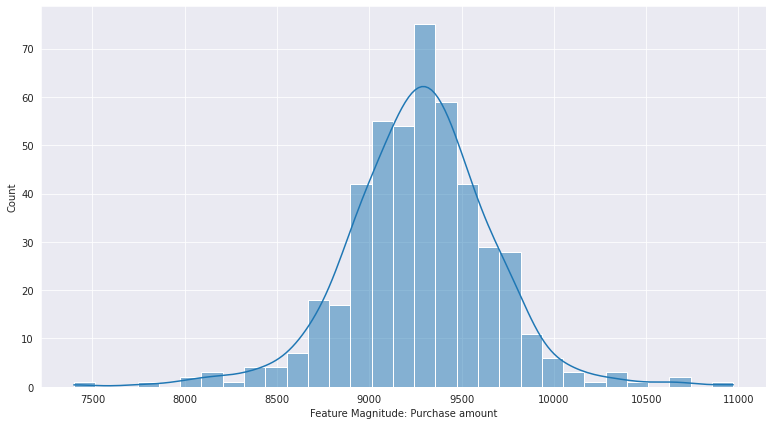

In [574]:
SDSM(a_df)

# Plotting sampling distribution of sample means for purchase amount for male customers. The distribution proves central limit theorem
1. Sample sizes used are 30,31,32,......,497,498,499
2. The distribution of sample means is Gaussian as shown in the below plots
3. The average purchase amount for male customers on Black Friday is 9437.53

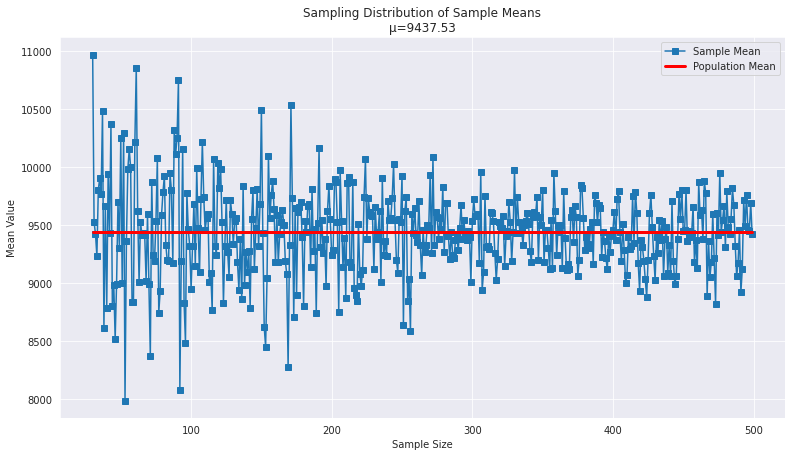

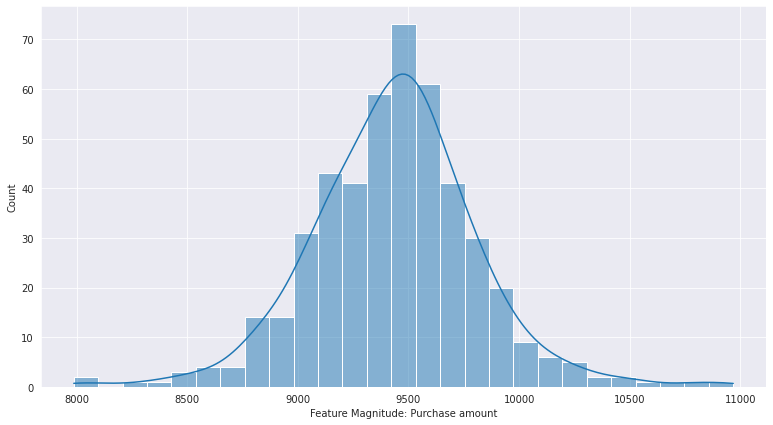

In [575]:
SDSM(a_df_male)

# Plotting sampling distribution of sample means for purchase amount for female customers. The distribution proves central limit theorem
1. Sample sizes used are 30,31,32,......,497,498,499
2. The distribution of sample means is Gaussian as shown in the below plots
3. The average purchase amount for female customers on Black Friday is 8734.57

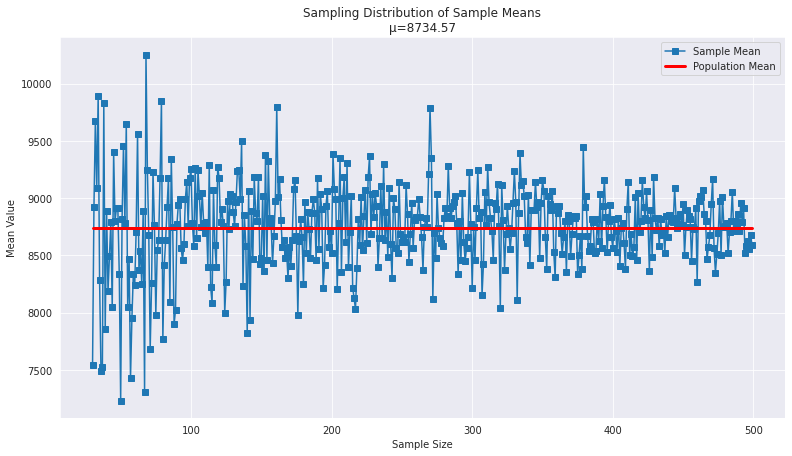

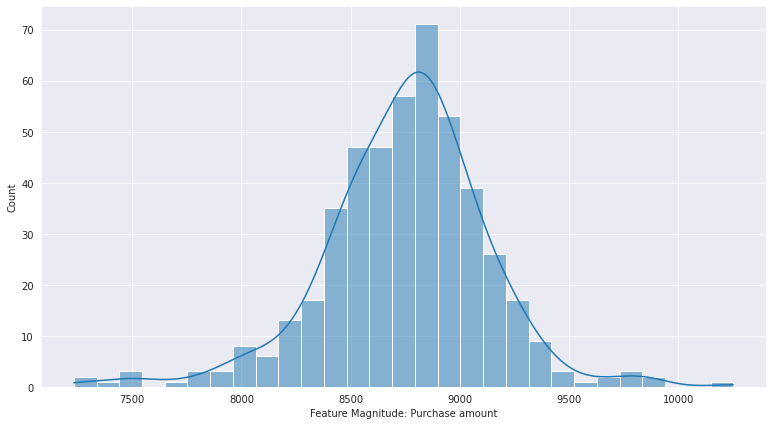

In [576]:
SDSM(a_df_female)

# Plotting sampling distribution of sample means for purchase amount for single customers. The distribution proves central limit theorem
1. Sample sizes used are 30,31,32,......,497,498,499
2. The distribution of sample means is Gaussian as shown in the below plots
3. The average purchase amount for single customers on Black Friday is 9265.91

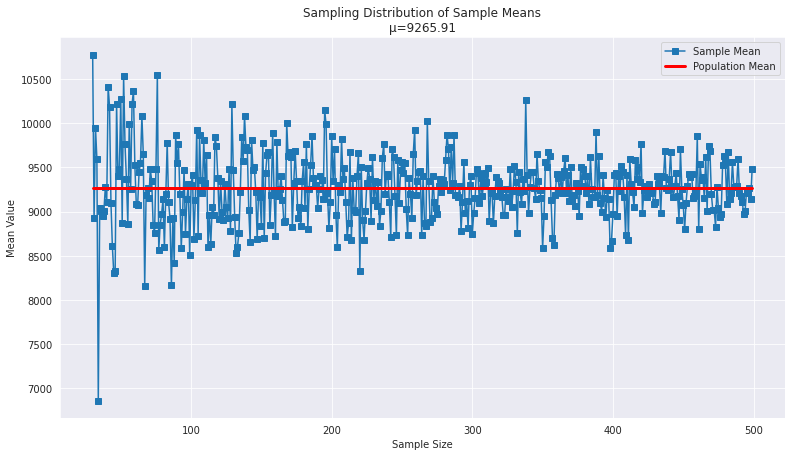

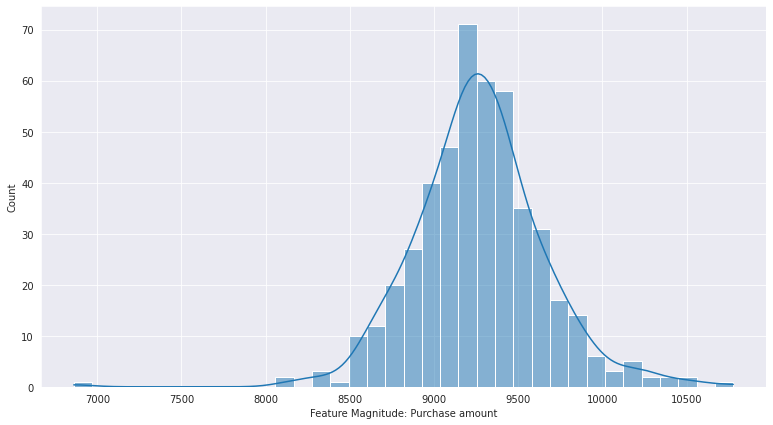

In [577]:
SDSM(a_df_single)

# Plotting sampling distribution of sample means for purchase amount for married customers. The distribution proves central limit theorem
1. Sample sizes used are 30,31,32,......,497,498,499
2. The distribution of sample means is Gaussian as shown in the below plots
3. The average purchase amount for married customers on Black Friday is 9261.17

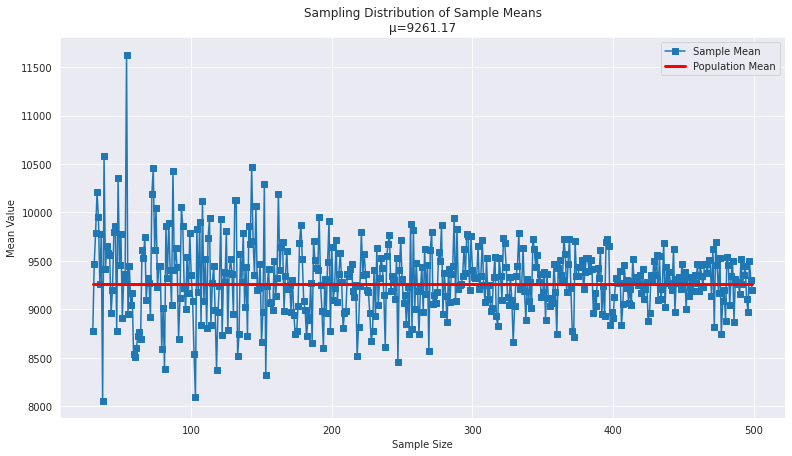

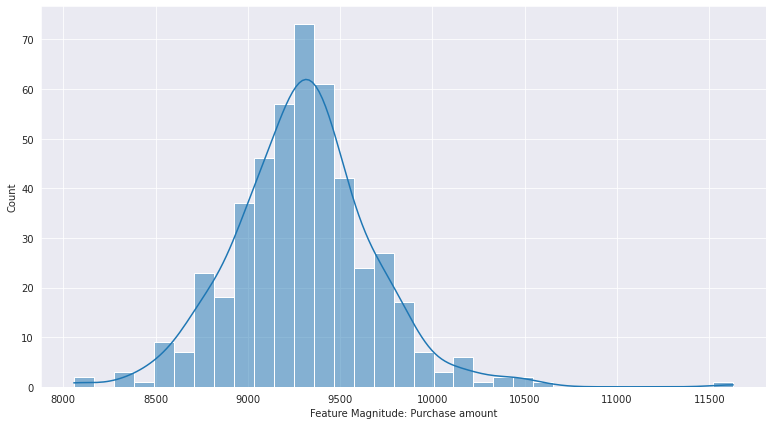

In [578]:
SDSM(a_df_married)

# Find unique age groups

In [579]:
a_df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

# Plotting sampling distribution of sample means for purchase amount for customers in different age groups. The distribution proves central limit theorem
1. Sample sizes used are 30,31,32,......,497,498,499
2. The distribution of sample means is Gaussian as shown in the below plots
3. The average purchase amount for different age group customers on Black Friday is shown in title of the plots

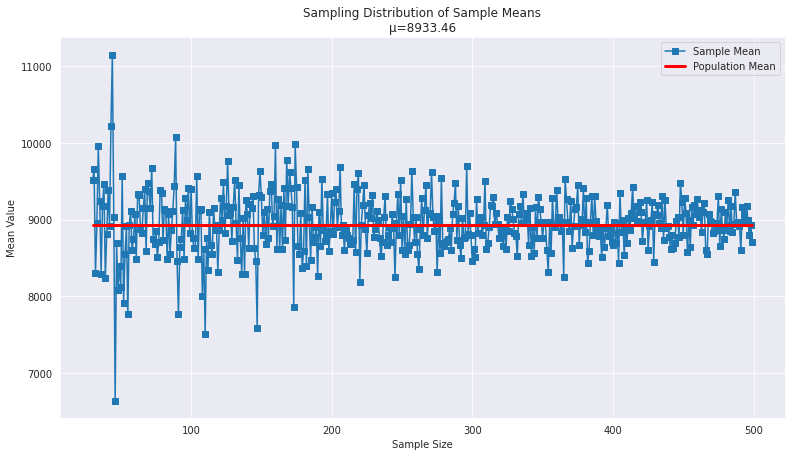

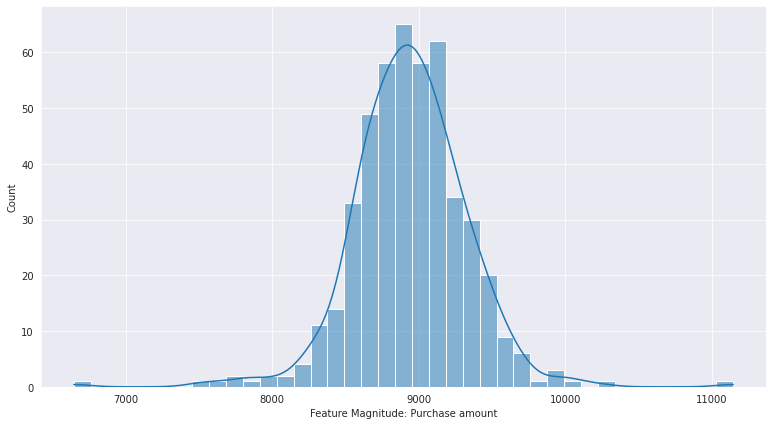

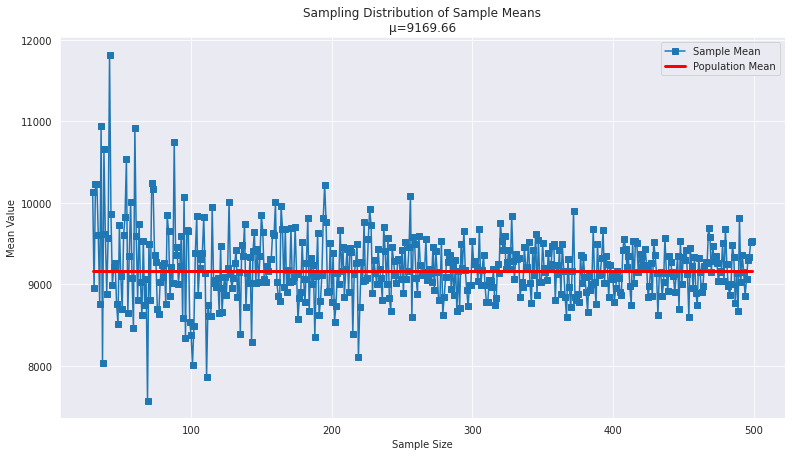

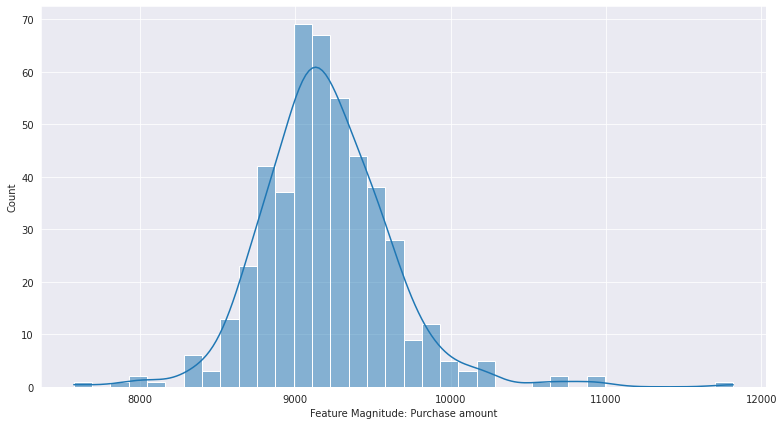

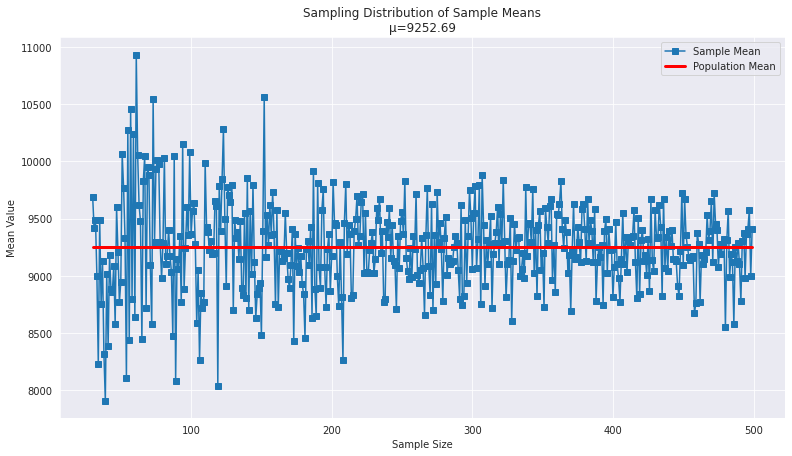

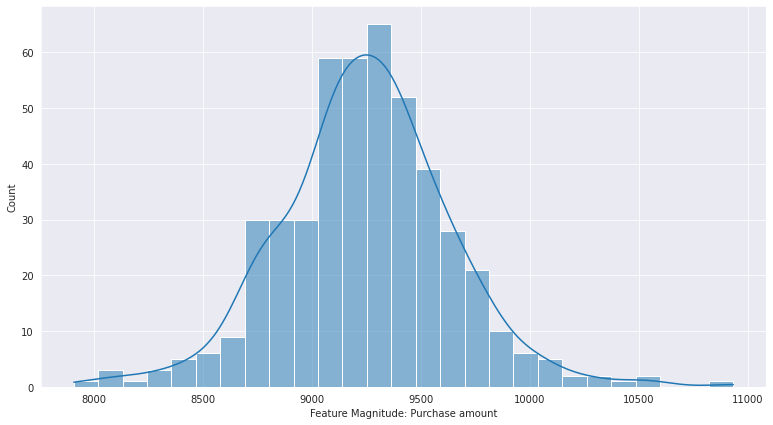

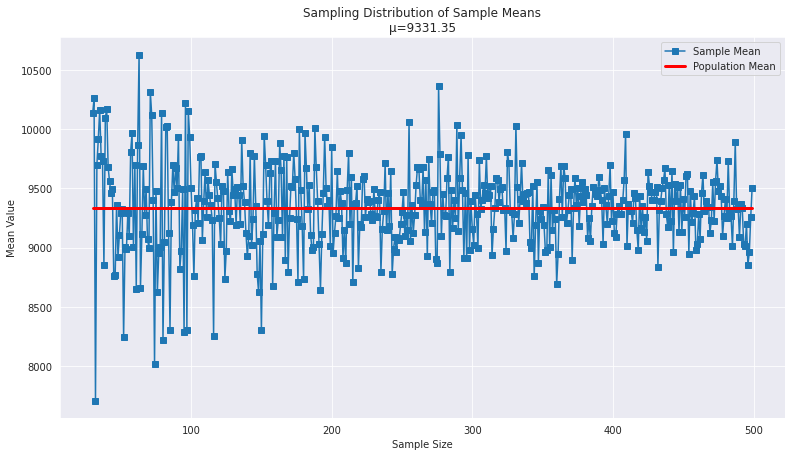

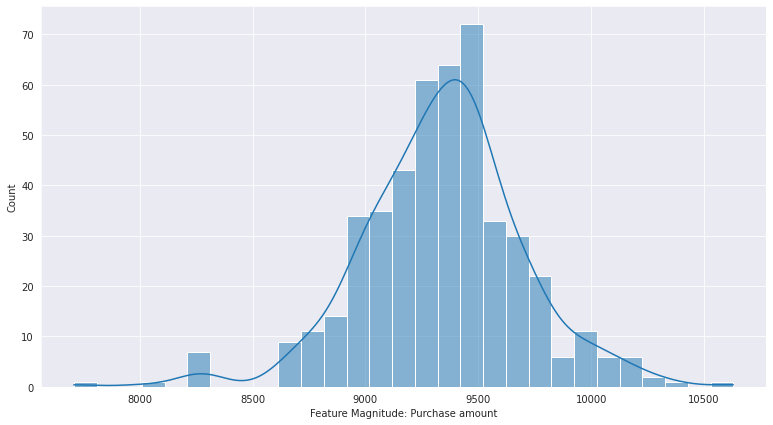

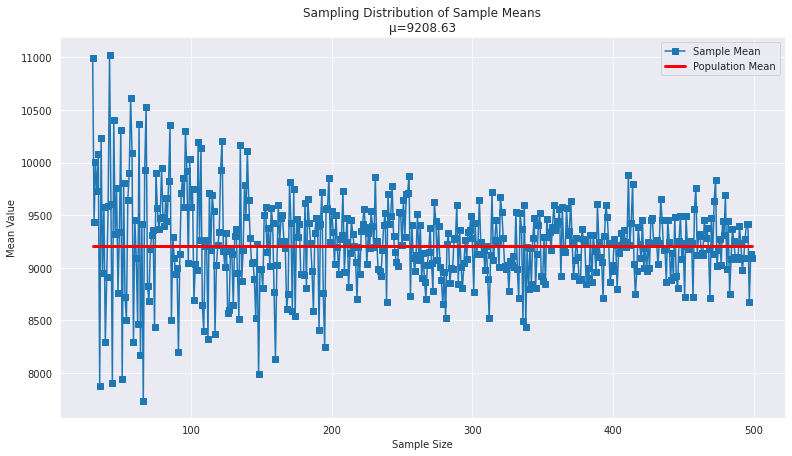

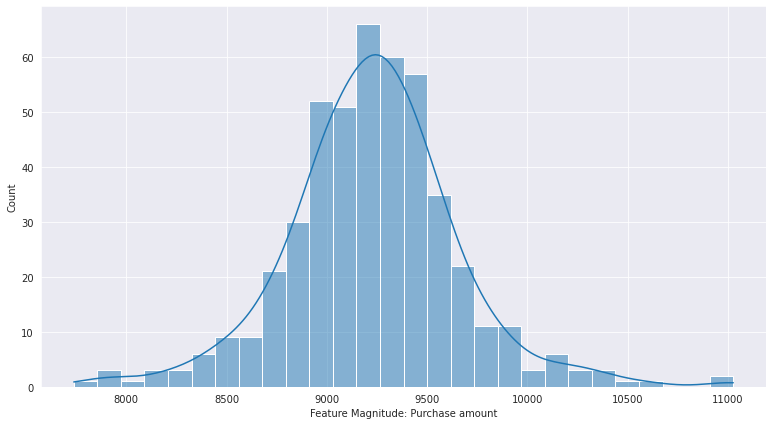

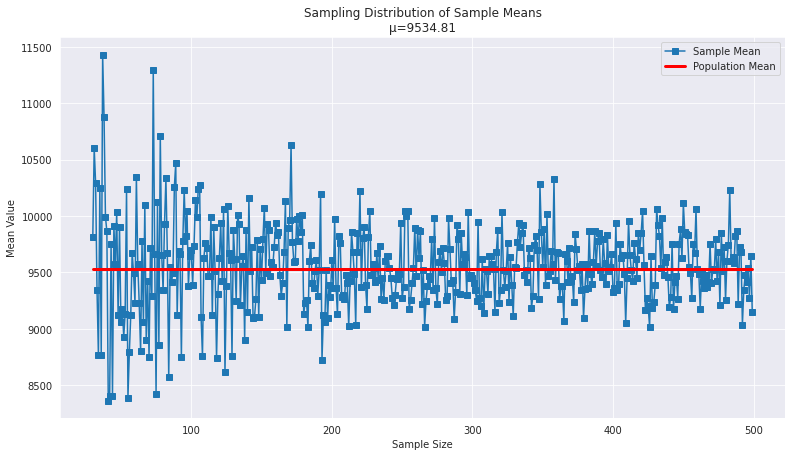

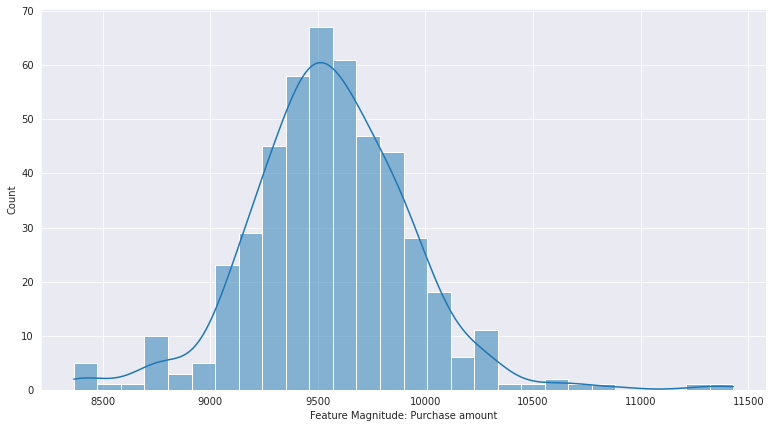

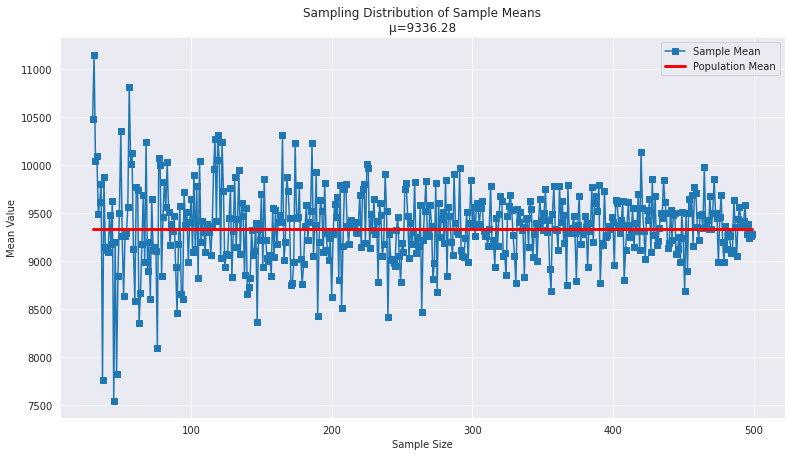

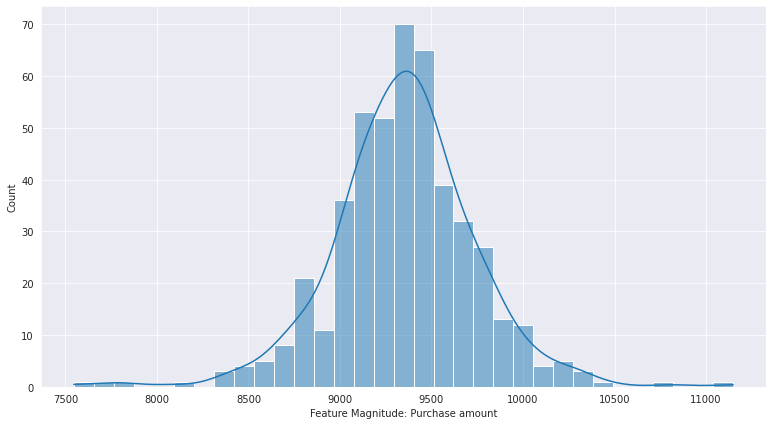

In [580]:
age_bins = [a_df_A00_A17,a_df_A18_A25,a_df_A26_A35,a_df_A36_A45,a_df_A46_A50,a_df_A51_A55,a_df_A55_AXX]
for age_group in age_bins:
    SDSM(age_group)

# Define function to calculate confidence interval
1. Parameters : Data, Sample Size and CI percentage

In [581]:
def computeCI(df,sample_size,ci):
    plt.rcParams['figure.figsize'] = (20,6)
    fig,ax = plt.subplots(1,len(df))
    for i in range(len(df)):
        pop_mean = np.mean(df[i]['Purchase'])
        sample = df[i].sample(n=sample_size)
        sample_mean = np.mean(sample['Purchase'])
        sample_std = np.std(sample['Purchase'],ddof=1)
        ci_p = (1 - ci/100)/2
        ci_q = 1 - ci_p
        confint = sample_mean + stats.t.ppf([ci_p, ci_q], sample_size-1) * sample_std/np.sqrt(sample_size)
        
        y = np.array([[confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1]])
        p = Polygon(y,facecolor='g',alpha=0.3)
        ax[i].add_patch(p)

        ax[i].plot([pop_mean, pop_mean],[0,1.5], 'k:', linewidth=2)
        ax[i].plot([sample_mean,sample_mean],[0,1], 'r--', linewidth=3)
        ax[i].set_yticks([])
        ax[i].set_xlabel('Data Values')
        ax[i].set_title("\u03bc : {}\nxbar: {}\nC.I. : [{}, {}]".format(
                            pop_mean.round(2),sample_mean.round(2),confint[0].round(2),confint[1].round(2)))
        ax[i].legend(('%g%% CI region'%ci,'Population mean','Sample mean'))
    plt.show()

# Compute confidence interval for male and female customers and draw C.I. plot side by side for Black Friday purchase amount
1. Sample size = 1000
2. Confidence = 90%, 95% and 99%
3. Left side column is for male customers and right side column is for female customers
4. First row is for 90% confidence, second row is for 95% confidence and third row is for 99% confidence
5. Title of each plot shows - population mean, sample mean and confidence interval

6. Conclusion: The purchase amount of male is always higher than female for all C.I. 90, 95 and 99
7. Conclusion: Looking at the boundries of C.I. male and female C.I. have very possibility of overlap

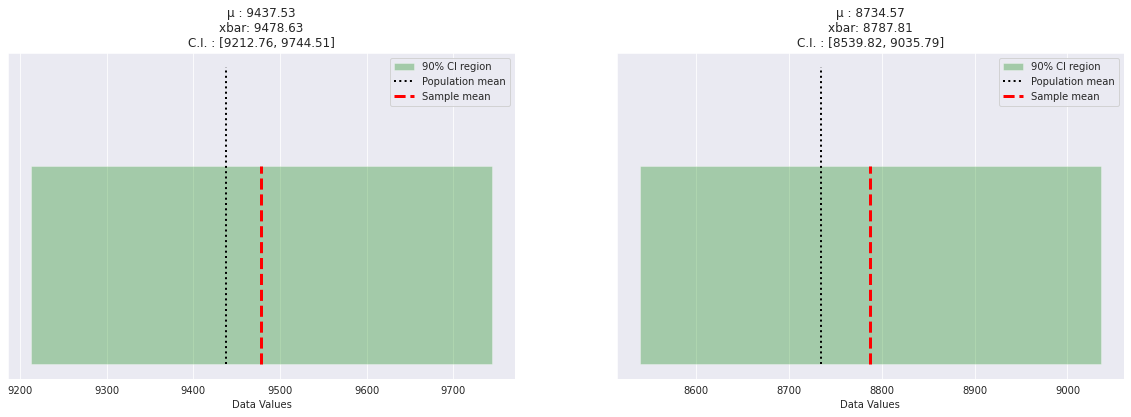

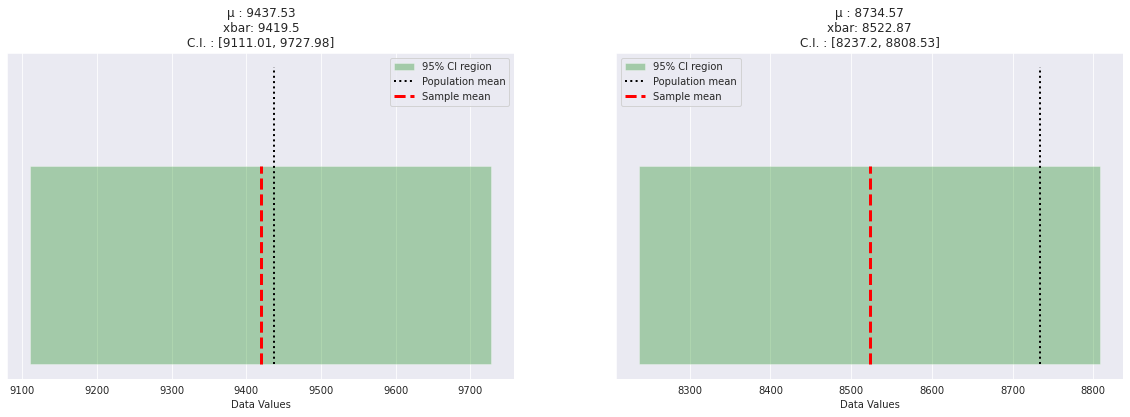

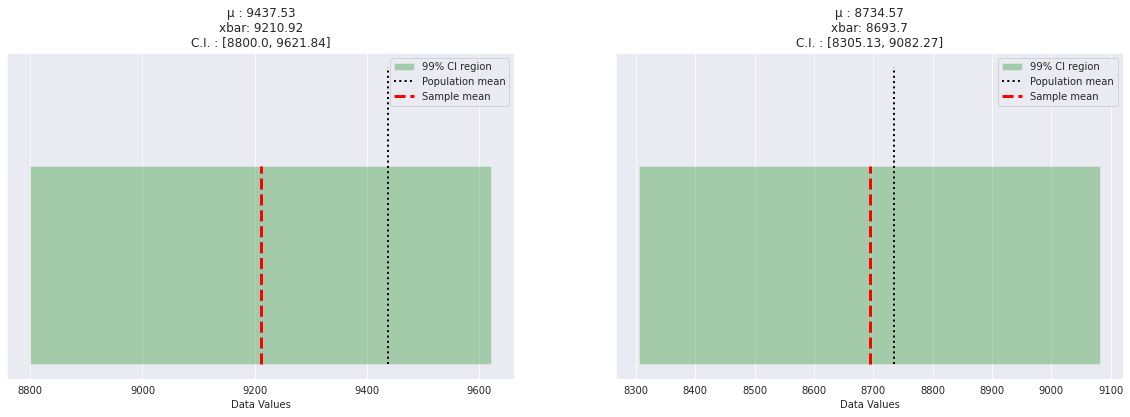

In [582]:
C = [90, 95, 99]
for c in C:
    computeCI([a_df_male,a_df_female],1000,c)

# Compute confidence interval for single and married customers and draw C.I. plot side by side for Black Friday purchase amount
1. Sample size = 1000
2. Confidence = 90%, 95% and 99%
3. Left side column is for single customers and right side column is for married customers
4. First row is for 90% confidence, second row is for 95% confidence and third row is for 99% confidence
5. Title of each plot shows - population mean, sample mean and confidence interval

6. Conclusion: The purchase amount of single is almost equivalent to married for all C.I. 90, 95 and 99
7. Conclusion: Looking at the boundries of C.I. single and married C.I. have quite high possibility of overlap

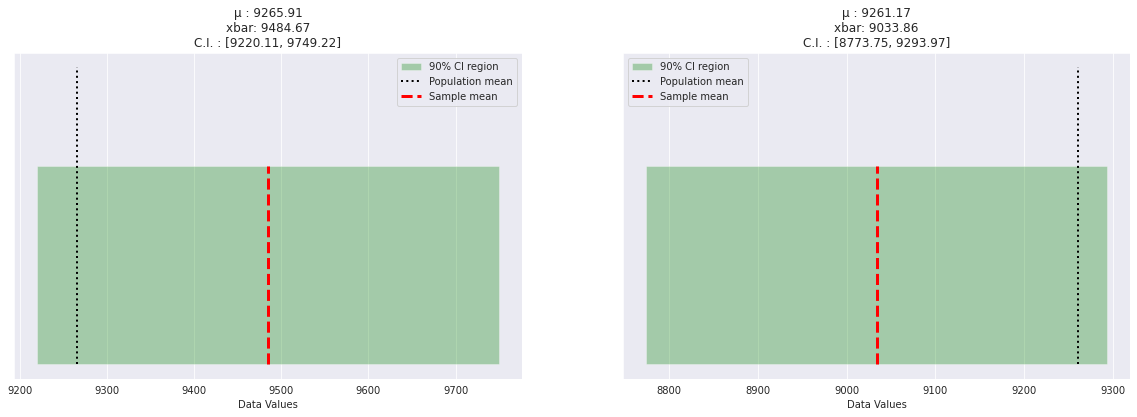

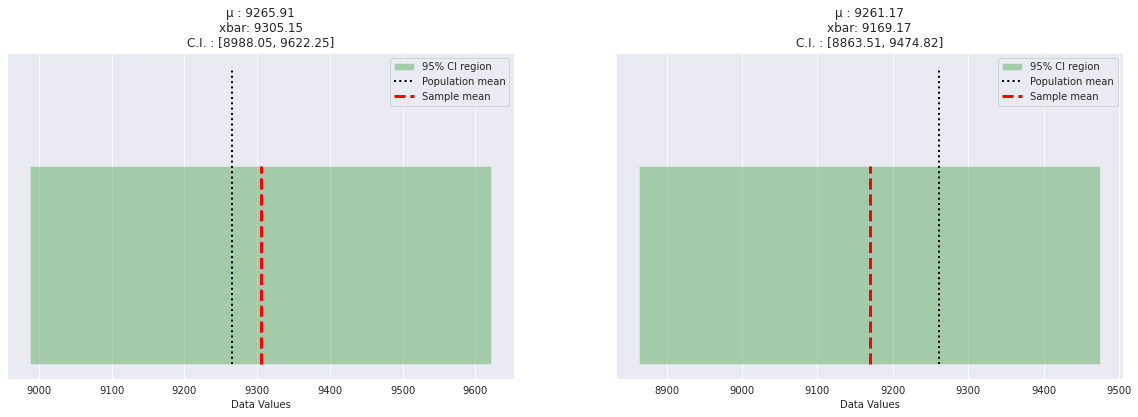

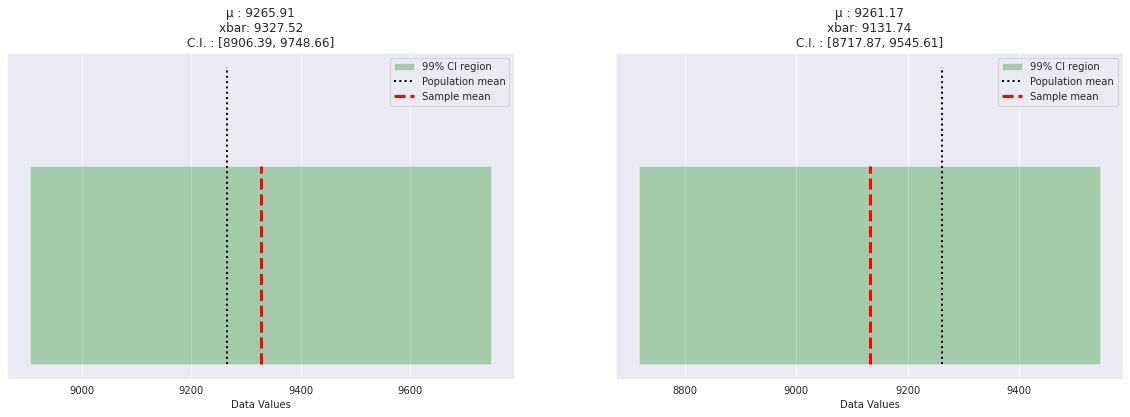

In [583]:
C = [90, 95, 99]
for c in C:
    computeCI([a_df_single,a_df_married],1000,c)

# Compute confidence interval for different age group customers and draw C.I. plot side by side for Black Friday purchase amount
1. Sample size = 1000
2. Confidence = 90%, 95% and 99%
3. Colums from left to right are for customers : [0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+]
4. First row is for 90% confidence, second row is for 95% confidence and third row is for 99% confidence
5. Title of each plot shows - population mean, sample mean and confidence interval

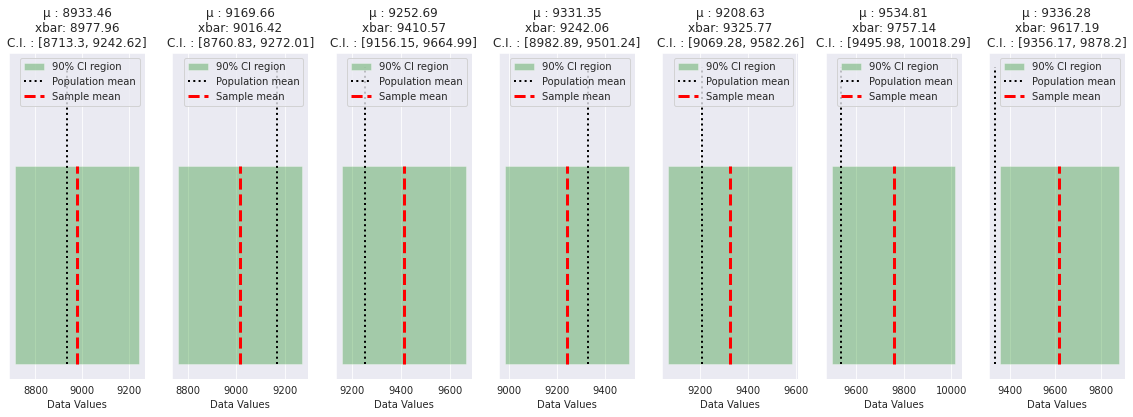

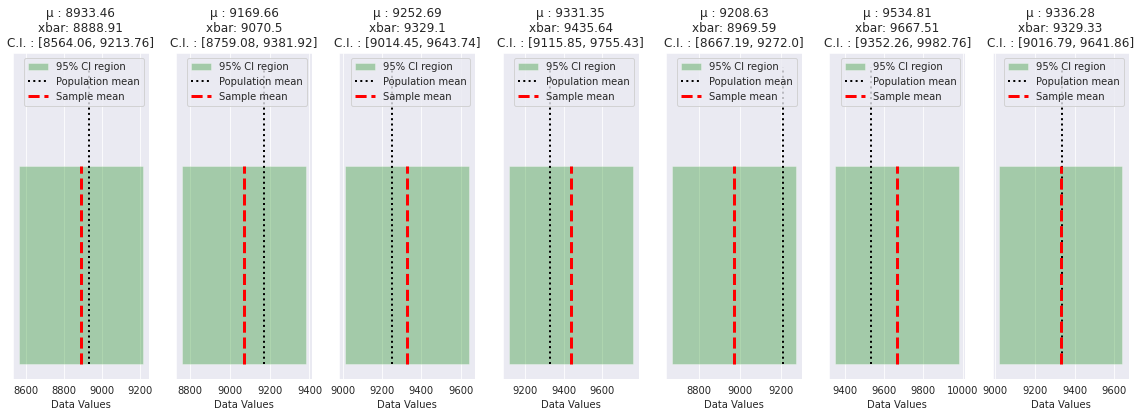

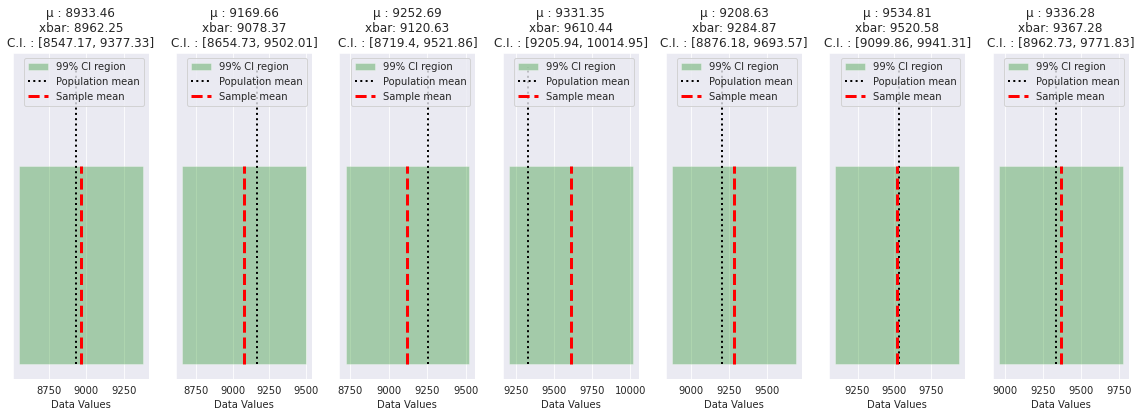

In [584]:
C = [90, 95, 99]
for c in C:
    computeCI([a_df_A00_A17,a_df_A18_A25,a_df_A26_A35,a_df_A36_A45,a_df_A46_A50,a_df_A51_A55,a_df_A55_AXX],1000,c)

# Function to get distribution of C.I.
1. The function will determine how much percentage of true population mean will fall within the given confidence interval for the given -- confidence, sample size and number of experiments
2. Input parameters to the function are data, sample size, number of experiments and confidence percentage

In [585]:
def distributionCI(df,sample_size,experiments,ci):
    pop_mean = np.mean(df['Purchase'])
    withinCI = np.zeros(experiments)
    ci_p = (1 - ci/100)/2
    ci_q = 1 - ci_p
    t = stats.t.ppf([ci_p, ci_q], sample_size - 1)
    root_n = np.sqrt(sample_size)
    
    for e in range(experiments):
        sample = df.sample(n = sample_size)
        sample_mean = np.mean(sample['Purchase'])
        sample_std = np.std(sample['Purchase'], ddof=1)
        confint = sample_mean + t * sample_std/root_n
        if pop_mean > confint[0] and pop_mean < confint[1]:
            withinCI[e] = 1
    
    #print("{}% of sample C.I.s contained the true population mean.".format((100*np.mean(withinCI)).round(2)))
    return (100*np.mean(withinCI)).round(2)

# Prepare dictionary where -
1. Key - Customer type
2. Values - Confidence interval distribution

In [586]:
CI = [90, 95, 99]
sample_size = 50
experiments = 500
sample_distributions = {'Male':{}
                        ,'Female':{}
                        ,'Single':{}
                        ,'Married':{}
                        ,'Age_00-17':{}
                        ,'Age_18-25':{}
                        ,'Age_26-35':{}
                        ,'Age_36-45':{}
                        ,'Age_46-50':{}
                        ,'Age_51-55':{}
                        ,'Age_55+':{}}
for ci in CI:
    sample_distributions['Male'][ci] = distributionCI(a_df_male,sample_size,experiments,ci)
    sample_distributions['Female'][ci] = distributionCI(a_df_female,sample_size,experiments,ci)
    sample_distributions['Single'][ci] = distributionCI(a_df_single,sample_size,experiments,ci)
    sample_distributions['Married'][ci] = distributionCI(a_df_married,sample_size,experiments,ci)
    sample_distributions['Age_00-17'][ci] = distributionCI(a_df_male,sample_size,experiments,ci)
    sample_distributions['Age_18-25'][ci] = distributionCI(a_df_male,sample_size,experiments,ci)
    sample_distributions['Age_26-35'][ci] = distributionCI(a_df_male,sample_size,experiments,ci)
    sample_distributions['Age_36-45'][ci] = distributionCI(a_df_male,sample_size,experiments,ci)
    sample_distributions['Age_46-50'][ci] = distributionCI(a_df_male,sample_size,experiments,ci)
    sample_distributions['Age_51-55'][ci] = distributionCI(a_df_male,sample_size,experiments,ci)
    sample_distributions['Age_55+'][ci] = distributionCI(a_df_male,sample_size,experiments,ci)

# Prepare dataFrame from dictionary
1. How to read draw conclusion from this dataFrame -
2. Columns - Customer type, 90% C.I., 95% C.I., 99% C.I.
3. Example - "For sample size of 50, confidence interval is calculated 500 times. Out of this C.I. distribution, 91.2% times population mean falls within 90% confidence interval..etc "

4. Conclusion: For male customers 91.2% of sample C.I. contained true population mean for 90% confidence
5. Conclusion: For male customers 96.0% of sample C.I. contained true population mean for 95% confidence
6. Conclusion: For male customers 99.8% of sample C.I. contained true population mean for 99% confidence

4. Conclusion: For female customers 90.6% of sample C.I. contained true population mean for 90% confidence
5. Conclusion: For female customers 94.8% of sample C.I. contained true population mean for 95% confidence
6. Conclusion: For female customers 99.4% of sample C.I. contained true population mean for 99% confidence

In [587]:
ci_distributions = pd.DataFrame(sample_distributions).transpose()
ci_distributions.index.names = ['Customers']
ci_distributions = ci_distributions.reset_index()
print('The table shows how much percentage of sample C.I.s contained true population mean for below parameters:')
print('Sample size : {}'.format(sample_size))
print('Number of experiments : {}'.format(experiments))
print('Confidence intervals : 90%, 95% and 99%')
ci_distributions

The table shows how much percentage of sample C.I.s contained true population mean for below parameters:
Sample size : 50
Number of experiments : 500
Confidence intervals : 90%, 95% and 99%


,Customers,90,95,99
0,Male,89.0,96.4,97.6
1,Female,90.0,94.2,98.8
2,Single,91.8,94.2,99.6
3,Married,90.6,96.6,99.4
4,Age_00-17,89.2,95.6,98.4
5,Age_18-25,88.8,95.0,98.8
6,Age_26-35,88.6,96.2,98.8
7,Age_36-45,91.4,95.0,98.8
8,Age_46-50,89.8,95.6,98.2
9,Age_51-55,88.8,95.6,99.2


# Define function to check if the confidence interval of different types of customers overlap
1. Input parameters to the function - Data, sample size, confidence interval, customer labels

In [588]:
def checkCIoverlap(df,sample_size,ci,labels):
    sns.set_style('darkgrid')
    plt.rcParams['figure.figsize'] = (12,8)
    fig,ax = plt.subplots(1,1)
    color = ['g','b']
    alfa = [0.5, 0.5]
    
    print('%s vs %s C.I. overlapping details'%(labels[0],labels[1]))
    print('C.I. = {}%'.format(ci))
    print('Sample size = {}'.format(sample_size))
    
    for i in range(len(df)):
        pop_mean = np.mean(df[i]['Purchase'])
        sample = df[i].sample(n=sample_size)
        sample_mean = np.mean(sample['Purchase'])
        sample_std = np.std(sample['Purchase'],ddof=1)
        ci_p = (1 - ci/100)/2
        ci_q = 1 - ci_p
        confint = sample_mean + stats.t.ppf([ci_p, ci_q], sample_size-1) * sample_std/np.sqrt(sample_size)
        
        print('--------------')
        print(labels[i])
        print('Population mean = {}'.format(pop_mean))
        print('Sample mean = {}'.format(sample_mean))
        print('Confidence Interval = ',confint)
        print('--------------')
        
        y = np.array([[confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1]])
        p = Polygon(y,facecolor=color[i],alpha=alfa[i],label='confidence interval for %s'%labels[i])
        ax.add_patch(p)

        if i == 0:
            ax.plot([pop_mean, pop_mean],[0,1.5], 'k:', linewidth=2, label='population mean for %s'%labels[i])
            ax.plot([sample_mean,sample_mean],[0,1], 'r--', linewidth=3, label='sample mean for %s'%labels[i])
            ax.set_yticks([])
            ax.set_xlabel('Data Values')
            ax.legend()
        else:
            ax.plot([pop_mean, pop_mean],[0,1.5], 'y:', linewidth=2, label='population mean for %s'%labels[i])
            ax.plot([sample_mean,sample_mean],[0,1], 'c--', linewidth=3, label='sample mean for %s'%labels[i])
            ax.set_yticks([])
            ax.set_xlabel('Data Values')
            ax.legend(loc='best')
    
    plt.show()

# Check if the confidence interval overlap for male and female customers
1. Sample size used is 5000
2. Conclusion: C.I. doesn't overlap for male and female. So, difference in the group is statically significant
3. Conclusion: Mean purchase amount of male and females is significantly different

Male vs Female C.I. overlapping details
C.I. = 90%
Sample size = 5000
--------------
Male
Population mean = 9437.526040472265
Sample mean = 9396.062
Confidence Interval =  [9277.99943919 9514.12456081]
--------------
--------------
Female
Population mean = 8734.565765155476
Sample mean = 8868.6734
Confidence Interval =  [8757.05568509 8980.29111491]
--------------


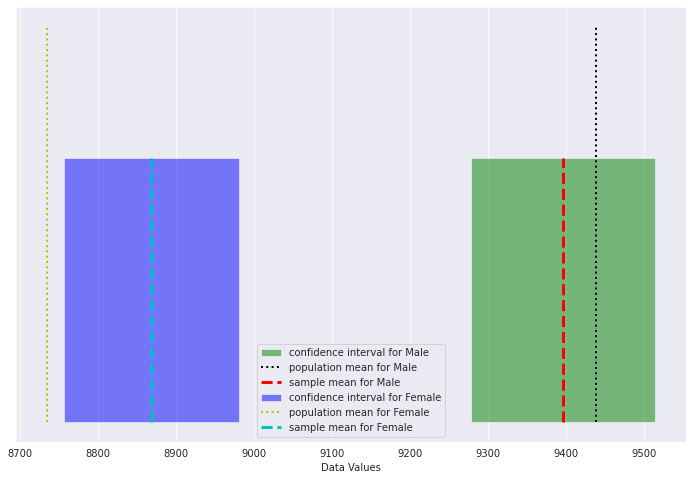

Male vs Female C.I. overlapping details
C.I. = 95%
Sample size = 5000
--------------
Male
Population mean = 9437.526040472265
Sample mean = 9334.2026
Confidence Interval =  [9194.79380466 9473.61139534]
--------------
--------------
Female
Population mean = 8734.565765155476
Sample mean = 8769.2426
Confidence Interval =  [8635.67090767 8902.81429233]
--------------


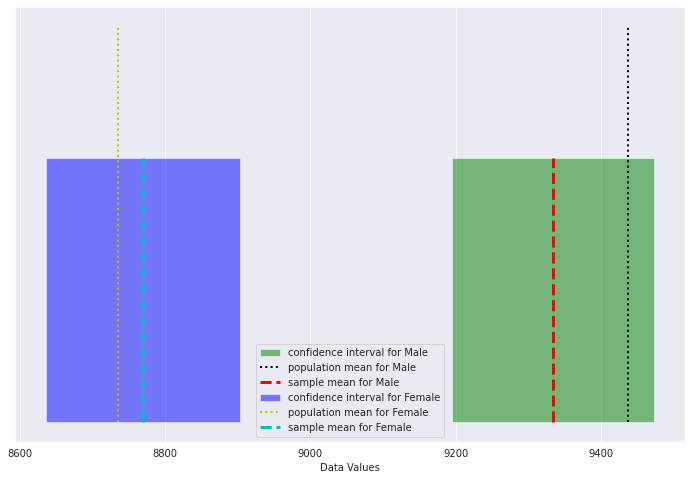

Male vs Female C.I. overlapping details
C.I. = 99%
Sample size = 5000
--------------
Male
Population mean = 9437.526040472265
Sample mean = 9324.6936
Confidence Interval =  [9139.90898728 9509.47821272]
--------------
--------------
Female
Population mean = 8734.565765155476
Sample mean = 8727.7828
Confidence Interval =  [8555.55372937 8900.01187063]
--------------


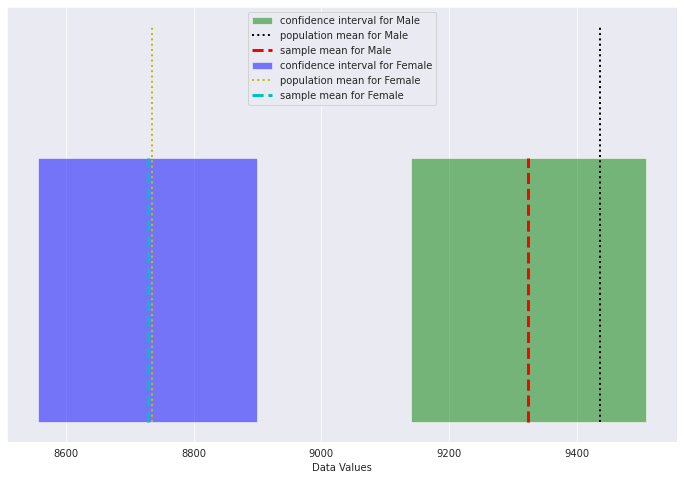

In [589]:
C = [90, 95, 99]
sample_size = 5000
for c in C:
    checkCIoverlap([a_df_male,a_df_female],sample_size,c,['Male','Female'])

# Check if the confidence interval overalp for single and married customers
1. Sample size used is 5000
2. Conclusion: C.I. overlap for single and married customers. So, difference in the group is not statically significant
3. Conclusion: Mean purchase amount of single and married customers is not significantly different

Single vs Married C.I. overlapping details
C.I. = 90%
Sample size = 5000
--------------
Single
Population mean = 9265.907618921507
Sample mean = 9367.2652
Confidence Interval =  [9248.83888455 9485.69151545]
--------------
--------------
Married
Population mean = 9261.174574082374
Sample mean = 9215.3092
Confidence Interval =  [9100.13508762 9330.48331238]
--------------


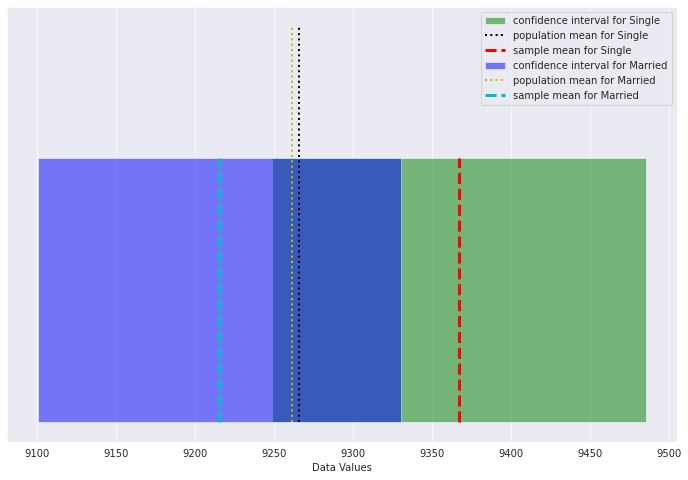

Single vs Married C.I. overlapping details
C.I. = 95%
Sample size = 5000
--------------
Single
Population mean = 9265.907618921507
Sample mean = 9306.226
Confidence Interval =  [9164.98502044 9447.46697956]
--------------
--------------
Married
Population mean = 9261.174574082374
Sample mean = 9268.787
Confidence Interval =  [9130.61141503 9406.96258497]
--------------


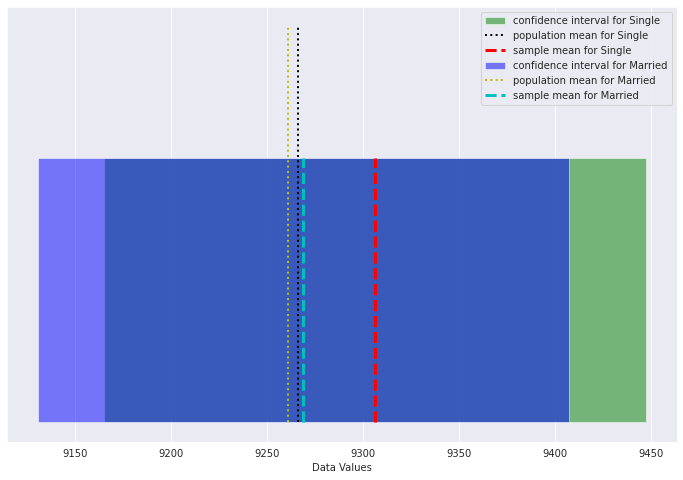

Single vs Married C.I. overlapping details
C.I. = 99%
Sample size = 5000
--------------
Single
Population mean = 9265.907618921507
Sample mean = 9270.5748
Confidence Interval =  [9085.50315652 9455.64644348]
--------------
--------------
Married
Population mean = 9261.174574082374
Sample mean = 9292.8586
Confidence Interval =  [9109.44031877 9476.27688123]
--------------


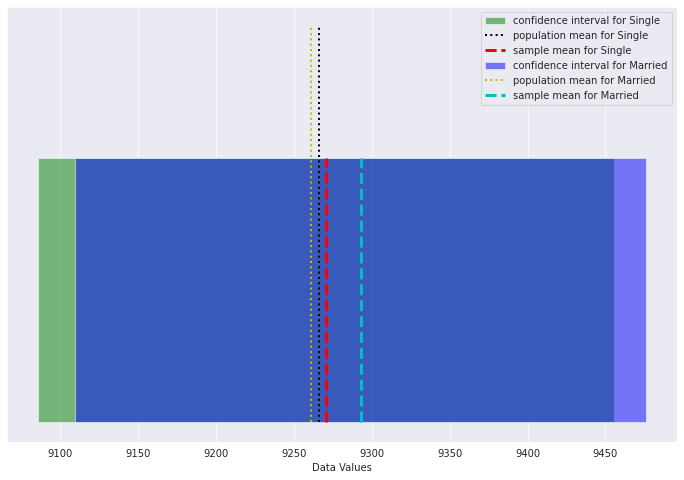

In [590]:
C = [90, 95, 99]
sample_size = 5000
for c in C:
    checkCIoverlap([a_df_single,a_df_married],sample_size,c,['Single','Married'])

# Draw correlation
1. Drawing correlation won't help much here as purchase is the only continuous varible
2. The correlation plot shows that the it won't be useful to draw any inference in this case

In [591]:
a_correl = a_df.corr()
a_correl

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


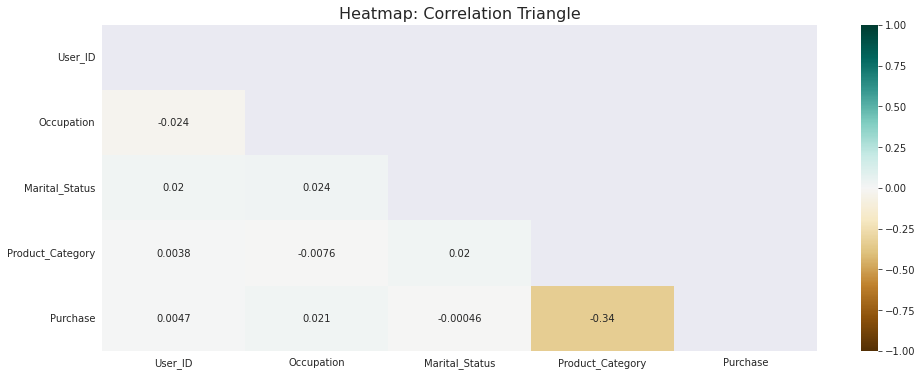

In [592]:
plt.rcParams['figure.figsize'] = (9,7)
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(a_correl, dtype=np.bool_))
heatmap = sns.heatmap(a_correl, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap: Correlation Triangle',fontdict={'fontsize':16})
plt.show()